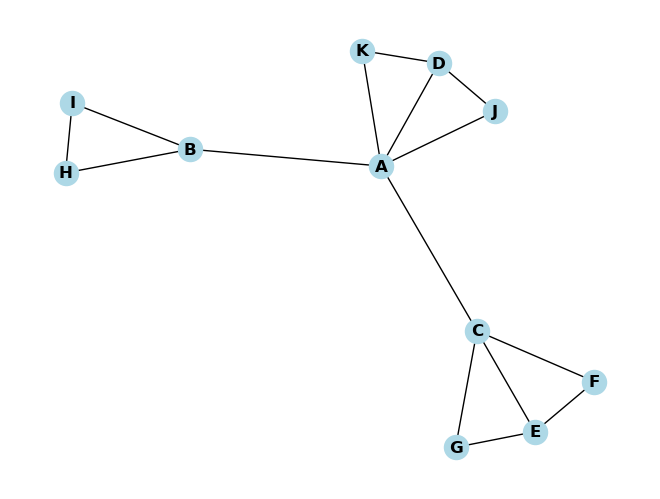

In [31]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(
    [
        ("A", "B"),
        ("A", "C"),
        ("A", "D"),
        ("C", "E"),
        ("C", "F"),
        ("B", "H"),
        ("H", "I"),
        ("D", "J"),
        ("A", "K"),
        ("D", "K"),
        ("B", "I"),
        ("J", "A"),
        ("F", "E"),
        ("G", "C"),
        ("G", "E"),
    ]
)

nx.draw(G, with_labels=True, node_color="lightblue", font_color="black", font_weight="bold")


In [32]:
nx.closeness_centrality(G)

{'A': 0.6666666666666666,
 'B': 0.5,
 'C': 0.5555555555555556,
 'D': 0.45454545454545453,
 'E': 0.4,
 'F': 0.38461538461538464,
 'H': 0.35714285714285715,
 'I': 0.35714285714285715,
 'J': 0.43478260869565216,
 'K': 0.43478260869565216,
 'G': 0.38461538461538464}

In [33]:
nx.edge_betweenness_centrality(G)

{('A', 'B'): 0.43636363636363634,
 ('A', 'C'): 0.509090909090909,
 ('A', 'D'): 0.14545454545454545,
 ('A', 'K'): 0.15454545454545454,
 ('A', 'J'): 0.15454545454545454,
 ('B', 'H'): 0.16363636363636364,
 ('B', 'I'): 0.16363636363636364,
 ('C', 'E'): 0.14545454545454545,
 ('C', 'F'): 0.15454545454545454,
 ('C', 'G'): 0.15454545454545454,
 ('D', 'J'): 0.02727272727272727,
 ('D', 'K'): 0.02727272727272727,
 ('E', 'F'): 0.02727272727272727,
 ('E', 'G'): 0.02727272727272727,
 ('H', 'I'): 0.01818181818181818}

In [34]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from pyvis.network import Network

# Apply the Girvan-Newman algorithm
communities = girvan_newman(G)
# Get the first set of communities
first_level_communities = next(communities)
second_level_communities = next(communities)
third_level_communities = next(communities)

# Convert to a list of sets
communities_list = [list(community) for community in second_level_communities]

# Create a Pyvis network
net = Network(notebook=True, cdn_resources='in_line')

# Add nodes with community information
color_map = plt.get_cmap("viridis")

colors = [mcolors.rgb2hex(color_map(i / len(communities_list))) for i in range(len(communities_list))]
for i, community in enumerate(communities_list):
    for node in community:
        net.add_node(node, label=str(node), color=colors[i])

# Add edges
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# # Enable buttons for interactive customization
net.show_buttons(filter_=["nodes", "edges", "physics"])

# # Save the network as an HTML file
net.show("network_graph.html")


network_graph.html


### Quaker data

In [37]:
from pathlib import Path
path_folder = Path("/Users/keithlowton/Desktop/Ks/Python code/Network analysis")
print(path_folder.exists())
print(path_folder)

True
/Users/keithlowton/Desktop/Ks/Python code/Network analysis


In [39]:
import csv
import os
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [59]:
with open(os.path.join(path_folder,"data/quakers_nodelist.csv"), 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

In [61]:
nodes[:2]

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149']]

In [49]:
with open(os.path.join(path_folder, "data/quakers_edgelist.csv"), 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:]

In [68]:
edges[:2]

[('George Keith', 'Robert Barclay'), ('George Keith', 'Benjamin Furly')]

In [53]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(G)

Graph with 119 nodes and 174 edges


In [64]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [65]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [72]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [73]:
for n in G.nodes():
    print(n, G.nodes[n]['birth_year'])

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [74]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [75]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [76]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [77]:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [78]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [79]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [80]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [81]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [82]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [83]:
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness:
    degree = degree_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

In [84]:
communities = community.greedy_modularity_communities(G)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [85]:
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: James Nayler | Eigenvector Centrality: 0.3352974100447867
Name: Margaret Fell | Eigenvector Centrality: 0.253170949905681
Name: Francis Howgill | Eigenvector Centrality: 0.19095393782681047
Name: Richard Farnworth | Eigenvector Centrality: 0.15368535029296415
Name: Anthony Pearson | Eigenvector Centrality: 0.11120476725256785


In [86]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c))

Class 0: ['Anthony Pearson', 'William Gibson', 'Dorcas Erbery', 'Thomas Holme', 'Richard Farnworth', 'Thomas Lower', 'Francis Howgill', 'Thomas Aldam', 'Robert Rich', 'Hannah Stranger', 'Martha Simmonds', 'Gervase Benson', 'James Nayler', 'Elizabeth Leavens', 'George Fox the younger', 'Margaret Fell', 'William Tomlinson']
Class 1: ['Peter Collinson', 'Anne Conway Viscountess Conway and Killultagh', 'William Penn', 'Thomas Story', 'David Lloyd', 'Joseph Besse', 'James Logan', 'Isabel Yeamans', 'Edward Haistwell', 'William Bradford', 'George Keith', 'Richard Claridge', 'Samuel Bownas', 'Tace Sowle', 'Jane Sowle', 'Isaac Norris', 'John Bartram']
Class 2: ['Edward Burrough', 'William Dewsbury', 'William Mucklow', 'Elizabeth Hooten', 'Thomas Salthouse', 'William Crouch', 'Ellis Hookes', 'Leonard Fell', 'Mary Prince', 'George Fox', 'William Mead', 'William Coddington', 'John Perrot', 'Mary Fisher', 'John Crook']
Class 3: ['George Whitehead', 'Alice Curwen', 'Henry Pickworth', 'Rebecca Traver

### Plotly

https://plotly.com/python/network-graphs/

In [105]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [87]:
data = pd.read_csv(os.path.join(path_folder, "data/quakers_nodelist.csv"), sep=",")
node_list = list(data.Name)
node_list[:5]

['Joseph Wyeth',
 'Alexander Skene of Newtyle',
 'James Logan',
 'Dorcas Erbery',
 'Lilias Skene']

In [88]:
edgelist_data = pd.read_csv(os.path.join(path_folder, "data/quakers_edgelist.csv"), sep=",")
edgelist_data.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [116]:
G = nx.Graph()

for i in node_list:
    G.add_node(i)

In [118]:

for i,j in edgelist_data.iterrows():
    G.add_edges_from([(j["Source"],j["Target"])])

#### Getting positions for each node

In [119]:
pos = nx.spring_layout(G, k=0.5, iterations=50)

In [120]:
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [121]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [122]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)),
    hovertemplate=
)

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

#### Colouring nodes

In [123]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace["marker"]["color"] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0] + " # of connections: " + str(len(adjacencies[1]))
    node_trace["text"] += tuple([node_info])


#### Plotting the figure

In [125]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<br>Quakers",
        titlefont=dict(size=16),
        showlegend=False,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(text="No. of connections", showarrow=False, xref="paper", yref="paper")],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    ),
)

iplot(fig)


### Pokemon data

In [126]:
import pandas as pd
import requests


def get_pokemon_by_gen(gen):
    try:
        url = f"https://pokeapi.co/api/v2/generation/{gen}/"
        response = requests.get(url)
        data = response.json()
        pokemon_list = [pokemon["name"] for pokemon in data["pokemon_species"]]
    except:
        print(f"Generation {gen} does not exist.")
    return pokemon_list


def import_pokemon_multi_gen(gen_list):
    pokemon_list_for_df = []
    location_area_list = []
    version_details_list = []

    poke_lists = []
    for gen in gen_list:
        pokemon_list = get_pokemon_by_gen(gen=gen)
        poke_lists.extend(pokemon_list)

    for pokemon in poke_lists:
        encounter_url = f"https://pokeapi.co/api/v2/pokemon/{pokemon.lower()}/encounters"
        response = requests.get(encounter_url)
        encounter_data = response.json()
        for encounter in range(len(encounter_data)):
            location = encounter_data[encounter]
            location_name = location["location_area"]["name"]
            version_details = location["version_details"]
            for version in range(len(version_details)):
                version_name = version_details[version]["version"]["name"]
                pokemon_list_for_df.append(pokemon)
                location_area_list.append(location_name)
                version_details_list.append(version_name)

    master_pokemon_df = pd.DataFrame(
        {"Pokemon": pokemon_list_for_df, "Location_Area": location_area_list, "Location_Version": version_details_list}
    )
    return master_pokemon_df


def create_pokemon_edgelist_df(pokemon_df):
    # Self-join to create pairs of Pokemon and count common habitats
    common_habitats_edges = (
        pokemon_df.merge(pokemon_df_crystal, on="Location_Area", suffixes=("_1", "_2"))  # Self-join on Location_Area
        .query("Pokemon_1 != Pokemon_2")  # Exclude pairs of the same Pokemon
        .groupby(["Pokemon_1", "Pokemon_2"])
        .size()
        .reset_index(name="num_of_habitats")  # Count unique habitats for each pair
    )

    # Rename columns
    common_habitats_edges.columns = ["pokemon_1", "pokemon_2", "num_of_habitats"]

    # Drop Duplicates
    common_habitats_edges["pair"] = common_habitats_edges.apply(
        lambda row: tuple(sorted([row["pokemon_1"], row["pokemon_2"]])), axis=1
    )
    common_habitats_edges = common_habitats_edges.drop_duplicates(subset="pair").drop(columns="pair")
    common_habitats_edges = common_habitats_edges.reset_index(drop=True)

    return common_habitats_edges


In [127]:
master_pokemon_df = import_pokemon_multi_gen(gen_list = [1,2])
master_pokemon_df.head()

,Pokemon,Location_Area,Location_Version
0,bulbasaur,cerulean-city-area,yellow
1,bulbasaur,pallet-town-area,red
2,bulbasaur,pallet-town-area,blue
3,bulbasaur,pallet-town-area,firered
4,bulbasaur,pallet-town-area,leafgreen


In [128]:
pokemon_df_crystal = master_pokemon_df[master_pokemon_df['Location_Version'] == 'crystal']
pokemon_df_crystal.head()

,Pokemon,Location_Area,Location_Version
39,caterpie,johto-route-30-area,crystal
42,caterpie,johto-route-31-area,crystal
45,caterpie,ilex-forest-area,crystal
50,caterpie,national-park-area,crystal
62,caterpie,kanto-route-2-south-towards-viridian-city,crystal


In [129]:
pokemon_edgelist = create_pokemon_edgelist_df(pokemon_df = pokemon_df_crystal)
pokemon_edgelist.head()

,pokemon_1,pokemon_2,num_of_habitats
0,abra,bellsprout,1
1,abra,butterfree,1
2,abra,caterpie,1
3,abra,cleffa,1
4,abra,corsola,1


In [134]:

pokemon_nodelist = set(list(pokemon_edgelist.pokemon_1.unique()) + list(pokemon_edgelist.pokemon_2.unique()))
pokemon_nodelist = list(pokemon_nodelist)
pokemon_nodelist[:5]

['lickitung', 'weezing', 'electrode', 'pineco', 'sneasel']

In [135]:
G = nx.Graph()

for i in pokemon_nodelist:
    G.add_node(i)

In [136]:
for i, j in pokemon_edgelist.iterrows():
    G.add_edges_from([(j["pokemon_1"], j["pokemon_2"])])


#### Getting positions for each node

In [137]:
pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [139]:
edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color="#888"), hoverinfo="none", mode="lines")

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]["pos"]
    x1, y1 = G.nodes[edge[1]]["pos"]
    edge_trace["x"] += tuple([x0, x1, None])
    edge_trace["y"] += tuple([y0, y1, None])


In [141]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode="markers",
    hoverinfo="text",
    marker=dict(
        showscale=True,
        colorscale="RdBu",
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(thickness=10, title="Node Connections", xanchor="left", titleside="right"),
        line=dict(width=0),
    ),
)

for node in G.nodes():
    x, y = G.nodes[node]["pos"]
    node_trace["x"] += tuple([x])
    node_trace["y"] += tuple([y])


#### Coloring nodes

In [ ]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace["marker"]["color"] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0] + " # of connections: " + str(len(adjacencies[1]))
    node_trace["text"] += tuple([node_info])


#### Plotting the figure

In [144]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<br>Pokemon connections",
        titlefont=dict(size=16),
        showlegend=False,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(text="No. of connections", showarrow=False, xref="paper", yref="paper")],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    ),
)

iplot(fig)
